In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor


import matplotlib.pyplot as plt
import math

In [3]:
file_path = 'C:\\Users\\tom04\\OneDrive\\文件\\code\\BAD Project\\BAD-Project\\BAD-Project\\historical_data.csv'
data = pd.read_csv(file_path)

In [4]:

# Convert the 'Date' column to datetime objects
# If the date is in the format 'YYYY-MM-DD', no format parameter is needed.
# If the format is different, specify it like 'format="%d/%m/%Y"' for 'day/month/year'
# The correct format is specified here
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Calculate if the date is a weekday or not (True for Mon-Fri, False for Sat-Sun)
data['Weekday'] = ~data['Date'].dt.dayofweek.isin([5, 6])

In [5]:
# Selecting relevant features and the target variable
X = data[['Holiday', 'Temperature', 'Rainfall', 'Weekday']]
y = data['Demand']

In [6]:
# Convert 'Holiday' and 'Weekday' from boolean to int (True to 1, False to 0)
X['Holiday'] = X['Holiday'].astype(int)
X['Weekday'] = X['Weekday'].astype(int)

C:\Users\tom04\AppData\Local\Temp\ipykernel_19828\3270979492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Holiday'] = X['Holiday'].astype(int)
C:\Users\tom04\AppData\Local\Temp\ipykernel_19828\3270979492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Weekday'] = X['Weekday'].astype(int)


In [7]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=8)


In [8]:
regressor = KNeighborsRegressor(n_neighbors=25)
regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=25)

In [9]:
#export model to file
import joblib
joblib.dump(regressor, 'knn_regressor_model.pkl')



['knn_regressor_model.pkl']

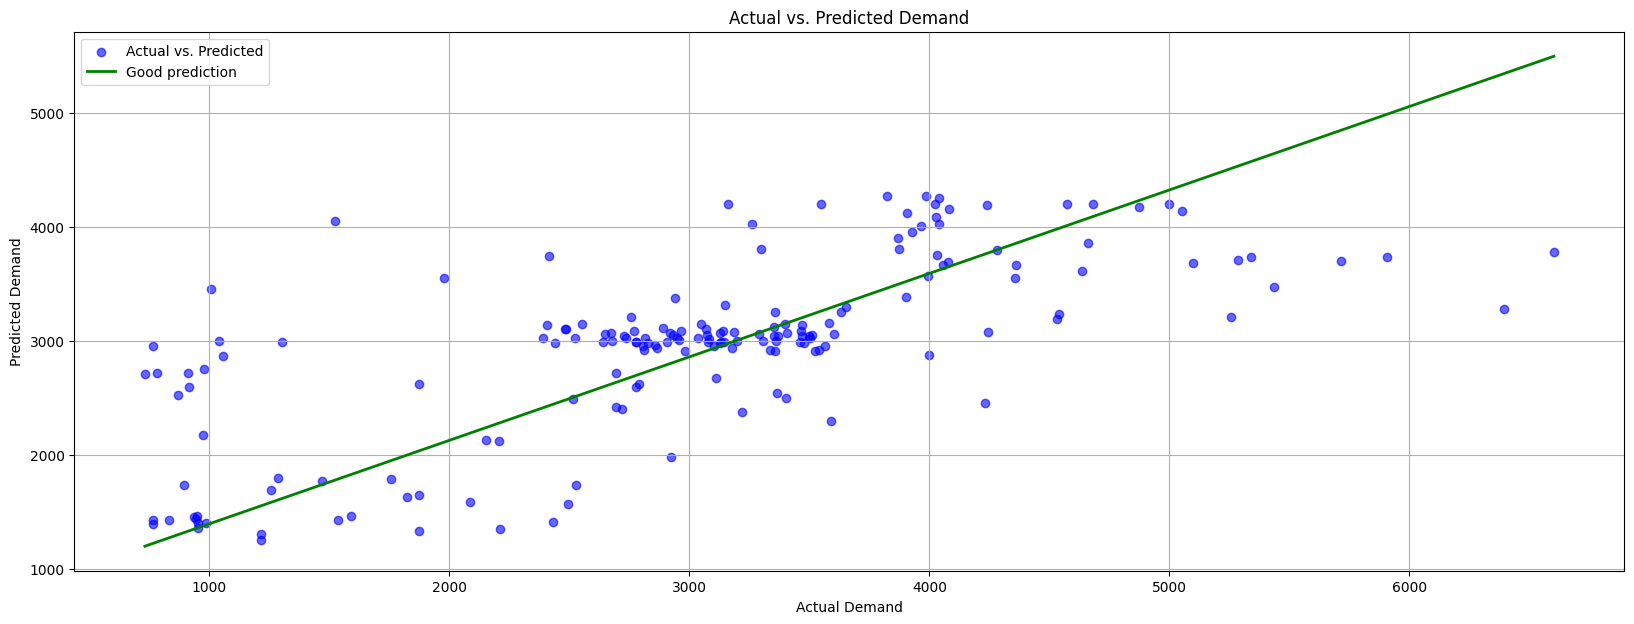

Regressor Score (R-squared): 0.4815521333430496


In [17]:

# Predict demand for the test set
predicted_test_demand = regressor.predict(X_test)

# Visualize the regression effect
plt.figure(figsize=(20, 7))

# Scatter plot of actual test data vs. predicted test data
plt.scatter(y_test, predicted_test_demand, color='blue', label='Actual vs. Predicted', alpha=0.6)

# Diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [1200,5500], linestyle='-', color='green', linewidth=2, label='Good prediction')

plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual vs. Predicted Demand')
plt.legend()
plt.grid(True)
plt.show()

# Display the actual test data


# Calculate the score of the regressor
score = regressor.score(X_test, y_test)
print("Regressor Score (R-squared):", score)

In [11]:
new_data = [[0, 19,3,0]]  # Isweekend, Temperature, Rainfall, Holiday

# Normalize and make a prediction using the trained model
predicted_demand = regressor.predict(new_data)
rounded_demand = math.floor(predicted_demand[0])

print(rounded_demand)

2444


c:\Users\tom04\OneDrive\文件\code\BAD Project\BAD-Project\BAD-Project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
